In [272]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing._label import _encode
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy import interp
from sklearn.metrics import roc_auc_score
from itertools import cycle
import numpy as np

In [273]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
np.unique(y)

array([0, 1, 2])

In [275]:
def plot_roc_auc(fpr, tpr, auc):
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(len(auc)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

# DecisionTree

## Directly Using DecisionTreeClassifier

In [276]:
# iris = datasets.load_iris()
iris = datasets.load_digits()
X = iris.data
y = iris.target
n_classes = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)
classifier = DecisionTreeClassifier(random_state=0)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
y_test[:5], y_score.shape, y_score[:5]

(array([2, 8, 2, 6, 6]),
 (899, 10),
 array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]))

In [277]:
# _encode(y_test)
# _encode(y_test, uniques=_encode(y_test), encode=True)

In [278]:
y_true_multilabel = label_binarize(y_test, _encode(y_test))
y_true_multilabel[:5] 

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [279]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_multilabel[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr

{0: array([0.        , 0.00617284, 1.        ]),
 1: array([0.        , 0.03584672, 1.        ]),
 2: array([0.        , 0.01363073, 1.        ])}

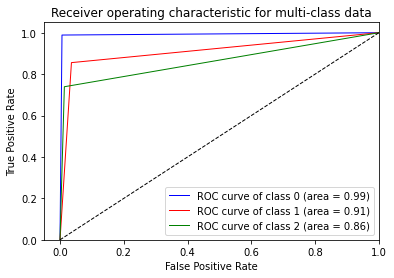

In [280]:
plot_roc_auc(fpr, tpr, roc_auc)

## Using OneVsRestClassifier

In [474]:
X = iris.data
y = iris.target
y = label_binarize(y, classes=np.unique(y))
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)
classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
y_test[:5], y_score.shape, y_score[:5], accuracy_score(y_score, y_test)

(array([[0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0]]),
 (75, 3),
 array([[0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.]]),
 0.88)

In [282]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr, tpr, fpr[0].shape, y_test[:, 5]

({0: array([0.        , 0.00617284, 1.        ]),
  1: array([0.        , 0.02843016, 1.        ]),
  2: array([0.        , 0.02354399, 1.        ]),
  3: array([0.        , 0.01240695, 1.        ]),
  4: array([0.        , 0.02673147, 1.        ]),
  5: array([0.        , 0.02149178, 1.        ]),
  6: array([0.        , 0.01234568, 1.        ]),
  7: array([0.        , 0.01583435, 1.        ]),
  8: array([0.        , 0.02106568, 1.        ]),
  9: array([0.        , 0.02230483, 1.        ])},
 {0: array([0.        , 0.98876404, 1.        ]),
  1: array([0.        , 0.85555556, 1.        ]),
  2: array([0.        , 0.89130435, 1.        ]),
  3: array([0.       , 0.8172043, 1.       ]),
  4: array([0.        , 0.82894737, 1.        ]),
  5: array([0.        , 0.73148148, 1.        ]),
  6: array([0.        , 0.91011236, 1.        ]),
  7: array([0.        , 0.93589744, 1.        ]),
  8: array([0.        , 0.64130435, 1.        ]),
  9: array([0.        , 0.67391304, 1.        ])},
 

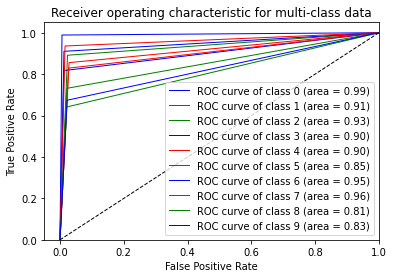

In [283]:
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# SVC

## Using OneVsRestClassifier

[[-0.76301132 -0.36482547  0.12386354]
 [-0.20224493 -0.63144366 -0.16612302]
 [ 0.11801481 -0.80263073 -0.32055874]
 [-0.90780855 -0.12395478  0.02199789]
 [-0.01116192 -0.27913475 -0.71889214]] [[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]] [[0.06548185 0.28009701 0.85673617]
 [0.39343527 0.24360441 0.48134758]
 [0.6970069  0.22194041 0.25610591]
 [0.03919529 0.31578785 0.75645528]
 [0.57996733 0.29251019 0.02658435]] 1.2023150330955947
(22,) (3,) 0.9126984126984127


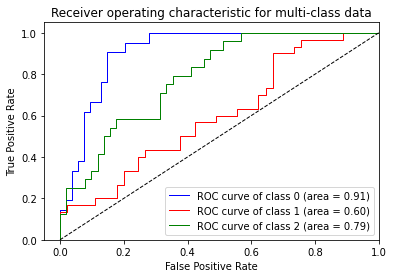

In [346]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
y_score_ = classifier.fit(X_train, y_train).predict_proba(X_test)

print(y_score[:5], y_test[:5], y_score_[:5], sum(y_score_[0, :]))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

print(fpr[0].shape, y_test[0].shape, roc_auc[0])

plot_roc_auc(fpr, tpr, roc_auc)

In [347]:
# y1 = y_score_.ravel()
# y2 = y1.reshape((-1, 1))
# y_score_.ndim, y_score_[:5], y1[:5], y2[:5], y2.shape

In [348]:
# y_score_.take([0], axis=1).ravel()

In [349]:
list(zip(y_score_[:, ], y_test[:, 0]))[0:25]

[(array([0.06548185, 0.28009701, 0.85673617]), 0),
 (array([0.39343527, 0.24360441, 0.48134758]), 0),
 (array([0.6970069 , 0.22194041, 0.25610591]), 1),
 (array([0.03919529, 0.31578785, 0.75645528]), 0),
 (array([0.57996733, 0.29251019, 0.02658435]), 1),
 (array([0.11592663, 0.28260871, 0.64927185]), 0),
 (array([0.61344851, 0.29753427, 0.01675224]), 1),
 (array([0.11355341, 0.3661768 , 0.06411484]), 0),
 (array([0.24535818, 0.29819703, 0.18124381]), 0),
 (array([0.18275436, 0.29570193, 0.31551446]), 0),
 (array([0.21284636, 0.28906341, 0.30883648]), 0),
 (array([0.27598735, 0.23436945, 0.7603437 ]), 0),
 (array([0.37080247, 0.24240723, 0.53195669]), 0),
 (array([0.51351352, 0.26620334, 0.12385265]), 0),
 (array([0.14803872, 0.2945416 , 0.42728055]), 0),
 (array([0.70002944, 0.25211349, 0.0649614 ]), 1),
 (array([0.07854163, 0.33186998, 0.36344899]), 0),
 (array([0.13960787, 0.31366317, 0.26457872]), 0),
 (array([0.86670886, 0.19908597, 0.17975006]), 1),
 (array([0.48131933, 0.20866372

## Directly Using SVC

[[2.56999261e-03 3.06192615e-01 6.91237393e-01]
 [4.46883656e-02 9.21958112e-01 3.33535222e-02]
 [9.97437416e-01 2.42581787e-03 1.36766030e-04]
 [5.29317046e-04 2.37371931e-01 7.62098752e-01]
 [9.37912282e-01 6.19493978e-02 1.38320306e-04]] [[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]] 1.0 (75, 3) (75, 3)
[0 0 1] [0.00256999 0.04468837 0.99743742]
[0 1 0] [0.30619261 0.92195811 0.00242582]
[1 0 0] [6.91237393e-01 3.33535222e-02 1.36766030e-04]
(4,) (3,) 1.0


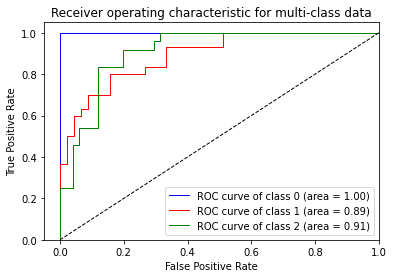

In [350]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

y_test = label_binarize(y_test, classes=[0, 1, 2])

classifier2 = svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state)

y_score2 = classifier.fit(X_train, y_train).predict_proba(X_test)

print(y_score2[:5], y_test[:5], sum(y_score2[0,:]), y_score2.shape, y_test.shape)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    print(y_test[:, i][:3], y_score2[:, i][:3])
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

print(fpr[0].shape, y_test[0].shape, roc_auc[0])

plot_roc_auc(fpr, tpr, roc_auc)

In [351]:
list(zip(y_score2[:, ], y_test[:, 0]))[0:25]

[(array([0.00256999, 0.30619261, 0.69123739]), 0),
 (array([0.04468837, 0.92195811, 0.03335352]), 0),
 (array([9.97437416e-01, 2.42581787e-03, 1.36766030e-04]), 1),
 (array([5.29317046e-04, 2.37371931e-01, 7.62098752e-01]), 0),
 (array([9.37912282e-01, 6.19493978e-02, 1.38320306e-04]), 1),
 (array([8.91554273e-04, 9.25702291e-02, 9.06538217e-01]), 0),
 (array([9.60279138e-01, 3.96015650e-02, 1.19297392e-04]), 1),
 (array([0.03863853, 0.29874684, 0.66261463]), 0),
 (array([0.02040071, 0.5631442 , 0.41645509]), 0),
 (array([0.1135224 , 0.73307975, 0.15339785]), 0),
 (array([0.0017849 , 0.48911586, 0.50909924]), 0),
 (array([0.0680532 , 0.26186303, 0.67008377]), 0),
 (array([0.02538033, 0.64312457, 0.33149509]), 0),
 (array([0.02659534, 0.56616386, 0.4072408 ]), 0),
 (array([0.02399146, 0.49597658, 0.48003196]), 0),
 (array([9.65749278e-01, 3.41358661e-02, 1.14856159e-04]), 1),
 (array([0.03398044, 0.50619369, 0.45982587]), 0),
 (array([0.02941586, 0.76826159, 0.20232256]), 0),
 (array([8

In [288]:
# y_score = y_score2[:, 0]
# y_true = y_test[:, 0]
# desc_score_indices = np.argsort(y_score, kind="mergesort")[::-1]
# y_score = y_score[desc_score_indices]
# y_true = y_true[desc_score_indices]
# tps = np.cumsum(y_true)

# distinct_value_indices = np.where(np.diff(y_score))[0]
# print(distinct_value_indices)
# threshold_idxs = np.r_[distinct_value_indices, y_true.size - 1]
# 
# print(y_score[:5])
# np.where(np.diff(y_score))

# Make Datasets

In [393]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [501]:
X, y = make_classification(n_samples=10000, n_features=10,
                           n_informative=3, n_redundant=0,
                           n_classes=4, random_state=3, 
                           shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_test[:10] 

array([0, 2, 3, 2, 3, 1, 3, 1, 2, 0])

In [502]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
# classifier = LogisticRegression().fit(X_train, y_train)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

In [503]:
classifier2 = OneVsRestClassifier(classifier)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
y_proba2 = classifier2.predict_proba(X_test)

In [504]:
y_pred[:5], y_proba[:5], y_test[:5], y_proba.take([0], axis=1)[:5], sum(y_proba[0])

(array([2, 2, 3, 2, 3]),
 array([[0.26180548, 0.08952184, 0.44407246, 0.20460022],
        [0.26314156, 0.08781517, 0.44699874, 0.20204453],
        [0.11257935, 0.24891474, 0.22398888, 0.41451703],
        [0.26138904, 0.08930444, 0.44768068, 0.20162583],
        [0.1075031 , 0.24407922, 0.2247383 , 0.42367938]]),
 array([0, 2, 3, 2, 3]),
 array([[0.26180548],
        [0.26314156],
        [0.11257935],
        [0.26138904],
        [0.1075031 ]]),
 1.0)

In [506]:
y_pred2[:5], y_proba2[:5], y_test[:5], y_proba2.take([0], axis=1)[:5], sum(y_proba2[0])

(array([2, 2, 3, 2, 3]),
 array([[0.25789388, 0.095327  , 0.43862605, 0.20815307],
        [0.26767312, 0.09425141, 0.436221  , 0.20185448],
        [0.12165368, 0.24488256, 0.25153998, 0.38192378],
        [0.24736136, 0.1013362 , 0.45418332, 0.19711912],
        [0.1016874 , 0.23353298, 0.25478891, 0.4099907 ]]),
 array([0, 2, 3, 2, 3]),
 array([[0.25789388],
        [0.26767312],
        [0.12165368],
        [0.24736136],
        [0.1016874 ]]),
 0.9999999999999999)

In [507]:
roc_auc_score(y_test, y_proba, multi_class='ovr')

0.8988841784900463

In [508]:
roc_auc_score(y_test, y_proba2, multi_class='ovr')

0.9074290114403379

In [469]:
y_true, y_score = label_binarize(y_test, np.unique(y_test)),  y_proba
y_true_c = y_true.take([0], axis=1).ravel()
y_score_c = y_score.take([0], axis=1).ravel()
y_true_c[:5], y_score_c[:5], y_true.shape, y_true.size, y_true_c.shape

(array([1, 0, 0, 1, 0]),
 array([0.61289852, 0.11614751, 0.29032406, 0.50503089, 0.27111952]),
 (2500, 3),
 7500,
 (2500,))

In [463]:
y_true_c.ravel()[:15], y_score_c.ravel()[:15], y_true_c.shape, y_score_c.shape

(array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0]),
 array([0.61289852, 0.11614751, 0.29032406, 0.50503089, 0.27111952,
        0.28086116, 0.61471111, 0.27364142, 0.1185053 , 0.27368418,
        0.44830435, 0.61511851, 0.6033857 , 0.2685912 , 0.27637347]),
 (2500,),
 (2500,))

In [446]:
y_true_c_ = (y_true_c == 1)
y_true_c_

array([ True, False, False, ..., False,  True, False])

In [452]:
desc_score_indices = np.argsort(y_score_c, kind="mergesort")[::-1]
desc_score_indices[:5], y_score_c[desc_score_indices[0:5]], \
desc_score_indices[-5:], y_score_c[desc_score_indices[-5:]]

(array([ 229, 2073, 1230,  292,  895]),
 array([0.63182885, 0.6288325 , 0.6264806 , 0.62446525, 0.62430072]),
 array([ 242, 1373, 1477, 1272,  738]),
 array([0.1099609 , 0.10982847, 0.10974196, 0.10970824, 0.10970656]))

In [460]:
y_score_ = y_score_c[desc_score_indices]
y_true_ = y_true_c_[desc_score_indices]
y_score_[:15], y_true_[:15], y_score_.shape

(array([0.63182885, 0.6288325 , 0.6264806 , 0.62446525, 0.62430072,
        0.62340062, 0.62306705, 0.62297294, 0.62242315, 0.62226942,
        0.62211933, 0.62207014, 0.62184472, 0.62159248, 0.62140127]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True]),
 (2500,))

In [459]:
distinct_value_indices = np.where(np.diff(y_score_))[0]
distinct_value_indices[-15:], distinct_value_indices.shape,  

(array([2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2492, 2493, 2494,
        2495, 2496, 2497, 2498]),
 (2422,),
 (2500,))

In [470]:
threshold_idxs = np.r_[distinct_value_indices, y_true_.size - 1]
threshold_idxs.shape, threshold_idxs[-15:], y_true_.size

((2423,),
 array([2484, 2485, 2486, 2487, 2488, 2489, 2490, 2492, 2493, 2494, 2495,
        2496, 2497, 2498, 2499]),
 2500)

In [473]:
tps = np.cumsum(y_true_)
tps.shape, tps[:15]

((2500,), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]))

In [436]:
fpr, tpr, thr = roc_curve(y_true_c, y_score_c)
fpr[:5], tpr[:5], thr[:5]

(array([0., 0., 0., 0., 0.]),
 array([0.        , 0.00124378, 0.01741294, 0.0199005 , 0.0920398 ]),
 array([1.63182885, 0.63182885, 0.62159248, 0.62140127, 0.61879478]))

In [419]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=classifier.predict(X_test))
print(sk_report)

              precision    recall  f1-score   support

           0   0.882280  0.885572  0.883923       804
           1   0.931592  0.885343  0.907879       846
           2   0.870641  0.910588  0.890167       850

    accuracy                       0.894000      2500
   macro avg   0.894838  0.893834  0.893990      2500
weighted avg   0.895010  0.894000  0.894153      2500

